In [109]:
import numpy as np
import pandas as pd
import utils
import seaborn as sn
import matplotlib.pyplot as plt
from joblib import dump, load
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, f1_score, accuracy_score, roc_auc_score
from sklearn.model_selection import train_test_split

# Load data

In [2]:
data_big_cleaned = pd.read_csv('data/big_cleaned_results.csv', index_col=0)
data_big_cleaned

,EXT1,EXT2,EXT3,EXT4,EXT5,EXT6,EXT7,EXT8,EXT9,EXT10,...,_OPN10,EXT,EST,AGR,CSN,OPN,MAX_SCORE,TYPE,CORR,B5_TYPE
0,4.0,1.0,5.0,2.0,5.0,1.0,5.0,2.0,4.0,1.0,...,5.0,46.0,36.0,39.0,32.0,45.0,46.0,0,1.000000,ESACO
1,3.0,5.0,3.0,4.0,3.0,3.0,2.0,5.0,1.0,5.0,...,3.0,20.0,35.0,40.0,37.0,35.0,40.0,1,1.000000,ISACO
2,2.0,3.0,4.0,4.0,3.0,2.0,1.0,3.0,2.0,5.0,...,4.0,25.0,34.0,40.0,34.0,41.0,41.0,1,0.984049,ISACO
3,2.0,2.0,2.0,3.0,4.0,2.0,2.0,4.0,1.0,4.0,...,3.0,26.0,31.0,38.0,25.0,39.0,39.0,96,0.972907,ESARO
4,3.0,3.0,3.0,3.0,5.0,3.0,3.0,5.0,3.0,4.0,...,5.0,29.0,41.0,42.0,48.0,48.0,48.0,1,0.985012,ESACO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
415057,3.0,1.0,4.0,3.0,2.0,1.0,3.0,4.0,4.0,4.0,...,5.0,33.0,26.0,40.0,35.0,42.0,42.0,0,0.975817,ESACO
415058,4.0,2.0,5.0,2.0,4.0,2.0,5.0,4.0,2.0,4.0,...,4.0,36.0,34.0,41.0,24.0,42.0,42.0,0,0.983439,ESARO
415059,2.0,2.0,4.0,5.0,4.0,1.0,1.0,1.0,5.0,5.0,...,2.0,32.0,14.0,43.0,34.0,40.0,43.0,4,0.970462,ENACO
415060,3.0,1.0,5.0,1.0,4.0,1.0,4.0,2.0,5.0,2.0,...,5.0,44.0,24.0,40.0,45.0,49.0,49.0,4,0.984814,ENACO


# Choose X and Y data

In [3]:
X=data_big_cleaned.iloc[:,:50]
print(X)
Y=data_big_cleaned['TYPE']
print(Y)

        EXT1  EXT2  EXT3  EXT4  EXT5  EXT6  EXT7  EXT8  EXT9  EXT10  ...  \
0        4.0   1.0   5.0   2.0   5.0   1.0   5.0   2.0   4.0    1.0  ...   
1        3.0   5.0   3.0   4.0   3.0   3.0   2.0   5.0   1.0    5.0  ...   
2        2.0   3.0   4.0   4.0   3.0   2.0   1.0   3.0   2.0    5.0  ...   
3        2.0   2.0   2.0   3.0   4.0   2.0   2.0   4.0   1.0    4.0  ...   
4        3.0   3.0   3.0   3.0   5.0   3.0   3.0   5.0   3.0    4.0  ...   
...      ...   ...   ...   ...   ...   ...   ...   ...   ...    ...  ...   
415057   3.0   1.0   4.0   3.0   2.0   1.0   3.0   4.0   4.0    4.0  ...   
415058   4.0   2.0   5.0   2.0   4.0   2.0   5.0   4.0   2.0    4.0  ...   
415059   2.0   2.0   4.0   5.0   4.0   1.0   1.0   1.0   5.0    5.0  ...   
415060   3.0   1.0   5.0   1.0   4.0   1.0   4.0   2.0   5.0    2.0  ...   
415061   3.0   4.0   3.0   2.0   4.0   2.0   1.0   2.0   4.0    5.0  ...   

        OPN1  OPN2  OPN3  OPN4  OPN5  OPN6  OPN7  OPN8  OPN9  OPN10  
0        5.0   1.

# Check if Y data is representative

In [4]:
pd.Series(Y).value_counts()

0      143667
1      105328
3       30589
4       22700
25      14877
7       14634
27      14107
14      13665
23       9760
31       7874
20       7747
5        6874
96       6171
179      6066
11       5556
16       5447
Name: TYPE, dtype: int64

# Split data to train and test

In [5]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Check if test data is representative

In [6]:
print(pd.Series(y_train).value_counts())

0      114788
1       84369
3       24451
4       18159
25      11916
7       11715
27      11311
14      10929
23       7942
31       6229
20       6191
5        5458
96       4963
179      4870
11       4422
16       4336
Name: TYPE, dtype: int64


# Functions for mapping classes from SOM model to classes from Y data

In [57]:
def find_class(predictions, i, mapping):
    keys=pd.Series(y_test.tolist())[list(pd.Series(predictions).loc[lambda x : x == i].index)].value_counts().keys().to_list()
    cnts=pd.Series(y_test.tolist())[list(pd.Series(predictions).loc[lambda x : x == i].index)].value_counts().to_list()
    lbl = None
    cnt = None
    for key_id in range(len(keys)):
        if keys[key_id] not in mapping.best_classes.values:
            lbl = keys[key_id]
            cnt = cnts[key_id]
            mapping.at[mapping[mapping['som']==i].index[0], 'counts']=cnt
            mapping.at[mapping[mapping['som']==i].index[0], 'best_classes']=lbl 
            break
        elif cnts[key_id] > mapping[mapping['best_classes']==keys[key_id]].counts.values[0]:
            lbl = keys[key_id]
            cnt = cnts[key_id]
            j=mapping[mapping['best_classes']==keys[key_id]].som.values[0]
            index = mapping[mapping['best_classes']==keys[key_id]].index[0]
            mapping.at[index, 'counts']=None
            mapping.at[index, 'best_classes']=None
            mapping.at[mapping[mapping['som']==i].index[0], 'counts']=cnt
            mapping.at[mapping[mapping['som']==i].index[0], 'best_classes']=lbl 
            lbl2, cnt2 = find_class(predictions, j, mapping)
            mapping.at[index, 'counts']=cnt2
            mapping.at[index, 'best_classes']=lbl2
            break
        
            
    return lbl, cnt

In [58]:
def map_class(predictions):
    d = {'best_classes': pd.Series(pd.Series(predictions).unique()), 'som': pd.Series(pd.Series(predictions).unique())}
    classes_mapping = pd.DataFrame(data=d)
    classes_mapping['best_classes']=None
    classes_mapping['counts']=None
#     i=0
    for i in pd.Series(predictions).unique():
        lbl, cnt = find_class(predictions, i, classes_mapping)
#         i+=1

    best_classes=pd.Series(y_test.unique())
    null_classes=best_classes[~best_classes.isin(classes_mapping['best_classes'].values)].values

    i=0
    for index, row in classes_mapping[classes_mapping['best_classes'].isna()].iterrows():
        classes_mapping.at[index, 'best_classes']=null_classes[i]
        i+=1

    return classes_mapping

# sklearn-som

In [59]:
from sklearn_som.som import SOM
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from joblib import dump, load
from sklearn.preprocessing import StandardScaler

# Optimize hiperparameters

In [61]:
import optuna
from optuna.samplers import TPESampler

def objective(trial):
    # 2. Suggest values of the hyperparameters using a trial object.
    param = {
        'm': 4,
        'n': 4,
        'dim': 50,
        'lr': trial.suggest_float('lr', 1e-2, 1, log=True),
        'sigma': trial.suggest_float('sigma', 1e-2, 3, log=True),
        'max_iter': trial.suggest_int('max_iter', 2000, 5000, log=True),
        'random_state': 42, #trial.suggest_int('random_state', 1, 42, log=True),
    }
    
    param2 = {
        'epochs': trial.suggest_int('epochs', 10, 100, log=True),
    }

    som = SOM(**param)
    som.fit(x_train.to_numpy(), **param2)
    predictions = som.fit_predict(x_test.to_numpy())
    predictions_fix = predictions.copy()
    for i in pd.Series(predictions).unique():
        key=pd.Series(y_test.tolist())[list(pd.Series(predictions).loc[lambda x : x == i].index)].value_counts().keys().to_list()[0]
        predictions_fix[predictions==i]=key
    score = f1_score(y_test, predictions_fix, average='macro')
    return score

# 3. Create a study object and optimize the objective function.
sampler = TPESampler(seed=10)  # Make the sampler behave in a deterministic way.
study = optuna.create_study(sampler=sampler, direction='maximize')
study.optimize(objective, n_trials=100)

[I 2023-08-25 09:51:51,291] A new study created in memory with name: no-name-60229b2d-7de8-4acb-9b55-94d6491d921e
[I 2023-08-25 09:52:04,880] Trial 0 finished with value: 0.03772603695290561 and parameters: {'lr': 0.3488520557156076, 'sigma': 0.011256544558788804, 'max_iter': 3574, 'epochs': 56}. Best is trial 0 with value: 0.03772603695290561.
[I 2023-08-25 09:52:20,908] Trial 1 finished with value: 0.03765648504067392 and parameters: {'lr': 0.0993148119483195, 'sigma': 0.03604529204778841, 'max_iter': 2398, 'epochs': 57}. Best is trial 0 with value: 0.03772603695290561.
[I 2023-08-25 09:52:39,946] Trial 2 finished with value: 0.03743877496269648 and parameters: {'lr': 0.021788216053884014, 'sigma': 0.01655115978306184, 'max_iter': 3748, 'epochs': 90}. Best is trial 0 with value: 0.03772603695290561.
[I 2023-08-25 09:52:59,663] Trial 3 finished with value: 0.037511695337205296 and parameters: {'lr': 0.010183487453386063, 'sigma': 0.18567880916039234, 'max_iter': 4211, 'epochs': 40}. B

[I 2023-08-25 10:01:22,022] Trial 35 finished with value: 0.15254570941335424 and parameters: {'lr': 0.17697119034106493, 'sigma': 0.5015677738235635, 'max_iter': 3534, 'epochs': 21}. Best is trial 26 with value: 0.23605723250262467.
[I 2023-08-25 10:01:37,898] Trial 36 finished with value: 0.12514418210649242 and parameters: {'lr': 0.12410739817131322, 'sigma': 2.1395145797312725, 'max_iter': 3068, 'epochs': 16}. Best is trial 26 with value: 0.23605723250262467.
[I 2023-08-25 10:01:54,487] Trial 37 finished with value: 0.13676818713520167 and parameters: {'lr': 0.09753576137791092, 'sigma': 1.5060679673546942, 'max_iter': 2832, 'epochs': 13}. Best is trial 26 with value: 0.23605723250262467.
[I 2023-08-25 10:02:10,437] Trial 38 finished with value: 0.03772603695290561 and parameters: {'lr': 0.26172974710913527, 'sigma': 0.23219990307392002, 'max_iter': 3374, 'epochs': 29}. Best is trial 26 with value: 0.23605723250262467.
[I 2023-08-25 10:02:25,748] Trial 39 finished with value: 0.037

[I 2023-08-25 10:10:50,838] Trial 71 finished with value: 0.14829940030504554 and parameters: {'lr': 0.06919875779255029, 'sigma': 0.7073757494108488, 'max_iter': 3051, 'epochs': 24}. Best is trial 26 with value: 0.23605723250262467.
[I 2023-08-25 10:11:06,420] Trial 72 finished with value: 0.07363781876498565 and parameters: {'lr': 0.060978374172477014, 'sigma': 0.49943031765319523, 'max_iter': 2911, 'epochs': 28}. Best is trial 26 with value: 0.23605723250262467.
[I 2023-08-25 10:11:21,325] Trial 73 finished with value: 0.11994170208848386 and parameters: {'lr': 0.05574900777416069, 'sigma': 0.6518631912700636, 'max_iter': 2815, 'epochs': 25}. Best is trial 26 with value: 0.23605723250262467.
[I 2023-08-25 10:11:36,735] Trial 74 finished with value: 0.14535938734011425 and parameters: {'lr': 0.07204877013147376, 'sigma': 0.9178489043601014, 'max_iter': 3180, 'epochs': 21}. Best is trial 26 with value: 0.23605723250262467.
[I 2023-08-25 10:11:52,454] Trial 75 finished with value: 0.11

# Train model

In [70]:
# som = load('som_big.joblib')
# {'lr': 0.20715800685544858, 'sigma': 0.48812890935056635, 'max_iter': 3510, 'random_state': 23}
# {'lr': 0.4484606809403018, 'sigma': 0.7617226203270118, 'max_iter': 3781, 'random_state': 5}
# {'lr': 1.5792491494219374, 'sigma': 0.6821505133687678, 'max_iter': 3575}
# {'lr': 1.1441603825302205, 'sigma': 0.3672077435443995, 'max_iter': 2409}
# {'lr': 0.4517516977630655, 'sigma': 0.6820945909305205, 'max_iter': 3153}
# {'lr': 0.08069476044481637, 'sigma': 0.7056978686242438, 'max_iter': 3213, 'epochs': 24}
som = SOM(m=4, n=4, dim=50, lr=0.08069476044481637, sigma=0.7056978686242438, max_iter=3213, random_state=42)
%time som.fit(x_train.to_numpy(), epochs=24)
predictions = som.fit_predict(x_test.to_numpy())
# dump(som, 'som_big.joblib') 

CPU times: user 7.49 s, sys: 17 µs, total: 7.49 s
Wall time: 8.11 s


In [71]:
pd.Series(predictions).value_counts()

10    7028
12    6551
5     6431
11    6001
14    5889
13    5750
6     5713
7     5671
9     5570
3     5534
2     5096
15    5092
1     4614
8     4561
4     3413
0       99
dtype: int64

# Map classes from som to classes from Y data

In [72]:
classes_mapping=map_class(predictions)
predictions_fix = predictions.copy()
for index, row in classes_mapping.iterrows():
    predictions_fix[predictions==classes_mapping.at[index, 'som']]=classes_mapping.at[index, 'best_classes']

# Simple method

In [73]:
# predictions_fix = predictions.copy()
# for i in pd.Series(predictions).unique():
#     key=pd.Series(y_test.tolist())[list(pd.Series(predictions).loc[lambda x : x == i].index)].value_counts().keys().to_list()[0]
#     predictions_fix[predictions==i]=key

# Gini

In [110]:
def gini_normalized(most_common, actual):
    gini = lambda a, p: 2 * roc_auc_score(a, p) - 1
    return gini(most_common, actual) / gini(most_common, most_common)

In [113]:
def gini(x):
    total = 0
    for i, xi in enumerate(x[:-1], 1):
        total += np.sum(np.abs(xi - x[i:]))
    return total / (len(x)**2 * np.mean(x))

In [115]:
for i in pd.Series(predictions).unique():
    print(i)
    keys=pd.Series(y_test.tolist())[list(pd.Series(predictions).loc[lambda x : x == i].index)].value_counts().keys().to_list()
    cnts=pd.Series(y_test.tolist())[list(pd.Series(predictions).loc[lambda x : x == i].index)].value_counts().to_list()
    print(pd.Series(y_test.tolist())[list(pd.Series(predictions).loc[lambda x : x == i].index)].value_counts())
    actual=np.array(pd.Series(y_test.tolist())[list(pd.Series(predictions).loc[lambda x : x == i].index)].to_list())
#     most_common=list(keys[0]*np.ones(len(actual), dtype=np.int8))
#     print(actual)
#     print(most_common)
    print(gini(actual))
    print('\n')

5
1      5934
27      224
23       81
0        64
179      39
14       28
7        26
5        12
16       11
25        8
96        3
20        1
dtype: int64
0.6880140017913592


1
1      2982
20      695
0       395
27      266
7       252
96       19
14        2
23        2
179       1
dtype: int64
0.6879779582205308


6
1      3808
25      812
27      379
179     252
5       189
23      145
16       44
0        29
14       19
7        17
4         9
31        7
3         3
dtype: int64
0.7756458167356579


14
0     3178
4     1531
11     572
31     407
3      135
16      53
27      11
96       1
7        1
dtype: int64
0.7452740166334069


8
0      3734
7       390
27      164
16      125
20       77
1        56
23        7
31        2
179       2
96        2
4         1
3         1
dtype: int64
0.8859129279165756


11
3      3207
0      1100
4       860
11      435
96      192
179      71
31       44
1        38
23       21
14       19
16        8
25        2
5         2
7        

# Check the resuts

In [74]:
print(classification_report(y_test,predictions_fix))

              precision    recall  f1-score   support

           0       0.92      0.18      0.31     28879
           1       0.92      0.28      0.43     20959
           3       0.53      0.52      0.53      6138
           4       0.33      0.37      0.35      4541
           5       0.00      0.00      0.00      1416
           7       0.32      0.56      0.41      2919
          11       0.10      0.50      0.16      1134
          14       0.35      0.71      0.47      2736
          16       0.03      0.11      0.04      1111
          20       0.15      0.45      0.23      1556
          23       0.00      0.01      0.01      1818
          25       0.33      0.63      0.43      2961
          27       0.10      0.23      0.14      2796
          31       0.12      0.51      0.19      1645
          96       0.09      0.44      0.16      1208
         179       0.04      0.21      0.07      1196

    accuracy                           0.30     83013
   macro avg       0.27   

In [75]:
score = f1_score(y_test, predictions_fix, average='weighted')
score

0.33821084741124696

In [76]:
accuracy_score(y_test, predictions_fix)

0.30381988363268403

In [77]:
f1_score(y_test, predictions_fix, average='macro')

0.24503999567303641

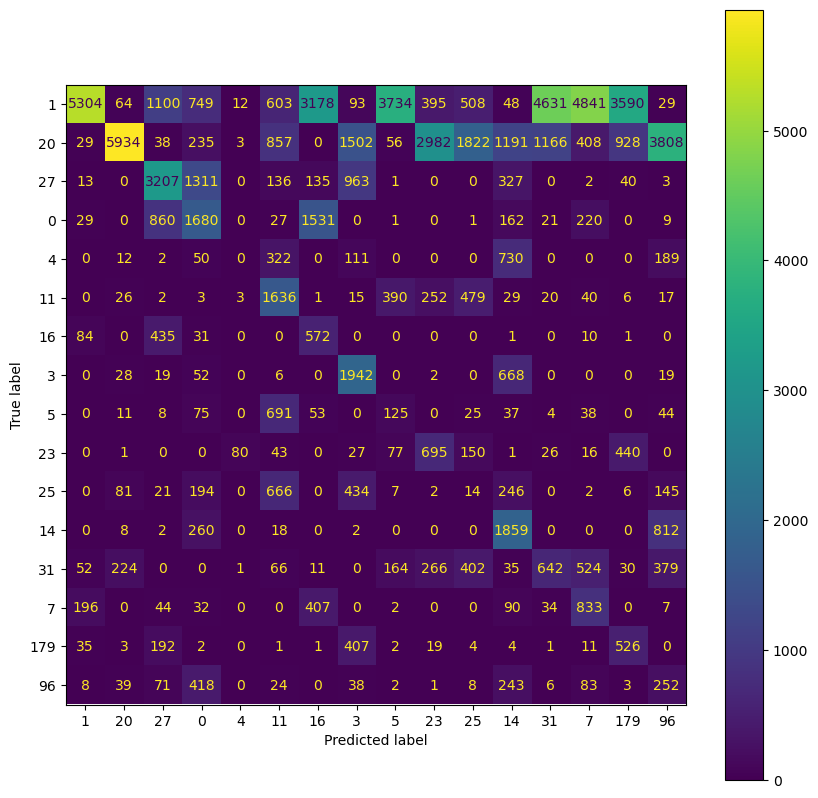

In [93]:
f, ax = plt.subplots(figsize=(10,10))
cm = confusion_matrix(y_test, predictions_fix, labels=y_test.unique())
disp = ConfusionMatrixDisplay.from_predictions(y_test, predictions_fix, display_labels=y_test.unique(), ax=ax)

# Somoclu

In [34]:
import somoclu
from mpl_toolkits.mplot3d import Axes3D


# Optimize hiperparameters

In [84]:
def objective2(trial):
    # 2. Suggest values of the hyperparameters using a trial object.
    param = {
        'n_columns': 4,
        'n_rows': 4,
        'initialcodebook': None,
        'kerneltype': 0, 
        'maptype': "planar",
        'gridtype': trial.suggest_categorical("gridtype", ["rectangular", "hexagonal"]), 
        'compactsupport': True, 
        'neighborhood': "gaussian",
        'std_coeff': trial.suggest_float('std_coeff', 1e-2, 3, log=True),
        'initialization': trial.suggest_categorical("initialization", ["random", "pca", None]),  
        'verbose': 0, # trial.suggest_categorical("verbose", [0, 1, 2]),  
    }
    
    param2 = {
        'epochs': trial.suggest_int('epochs', 10, 100, log=True),
        'radius0': trial.suggest_float('radius0', 0, 5000, log=True),
        'radiusN': 1,
        'radiuscooling': trial.suggest_categorical("radiuscooling", ["linear", "expotential"]),
        'scale0': trial.suggest_float('lr', 1e-2, 1, log=True),
        'scaleN': trial.suggest_float('lr', 1e-3, 1e-1, log=True),,
        'scalecooling': trial.suggest_categorical("scalecooling", ["linear", "expotential"]),
    }
    
    def get_labels(som2):
        grid_labels = [tuple(grid_label) for grid_label in som2.bmus]
        unique_labels = [
            tuple(grid_label) for grid_label in np.unique(grid_labels, axis=0)
        ]
        # Generate mapping
        labels_mapping = {
            grid_label: cluster_label
            for grid_label, cluster_label in zip(
                unique_labels, range(len(unique_labels))
            )
        }
        labels = np.array(
            [labels_mapping[grid_label] for grid_label in grid_labels]
        )
        predictions2=pd.Series(labels)
        return predictions2

    som2 = somoclu.Somoclu(**param)
    som2.train(np.float32(x_train.to_numpy()), **param2)
    som2.train(np.float32(x_test.to_numpy()), **param2)
    predictions2 = get_labels(som2)
    classes_mapping2=map_class(predictions2)
    predictions_fix2 = predictions2.copy()
    for index, row in classes_mapping2.iterrows():
        predictions_fix2[predictions2==classes_mapping2.at[index, 'som']]=classes_mapping2.at[index, 'best_classes']
    score = f1_score(y_test, predictions_fix2, average='macro')
    return score

# 3. Create a study object and optimize the objective function.

sampler2 = TPESampler(seed=10)  # Make the sampler behave in a deterministic way.
study2 = optuna.create_study(sampler=sampler2, direction='maximize')
study2.optimize(objective2, n_trials=100)

[I 2023-07-27 01:31:01,141] A new study created in memory with name: no-name-a6d22e35-06d5-4d7d-8ce6-4f1724770a43
[I 2023-07-27 01:31:05,900] Trial 0 finished with value: 0.21006933994746213 and parameters: {'gridtype': 'rectangular', 'std_coeff': 0.01517310653130157, 'initialization': 'pca'}. Best is trial 0 with value: 0.21006933994746213.
[I 2023-07-27 01:31:09,510] Trial 1 finished with value: 0.2506232198413363 and parameters: {'gridtype': 'rectangular', 'std_coeff': 0.2671509618739662, 'initialization': 'random'}. Best is trial 1 with value: 0.2506232198413363.
[I 2023-07-27 01:31:13,565] Trial 2 finished with value: 0.25639560058928396 and parameters: {'gridtype': 'hexagonal', 'std_coeff': 0.310183498671109, 'initialization': 'pca'}. Best is trial 2 with value: 0.25639560058928396.
[I 2023-07-27 01:31:17,337] Trial 3 finished with value: 0.17802527058642323 and parameters: {'gridtype': 'rectangular', 'std_coeff': 1.372401552964429, 'initialization': 'random'}. Best is trial 2 wi

[I 2023-07-27 01:34:33,215] Trial 36 finished with value: 0.2360868183555332 and parameters: {'gridtype': 'hexagonal', 'std_coeff': 0.3205660656231137, 'initialization': 'random'}. Best is trial 24 with value: 0.2878121799258846.
[I 2023-07-27 01:34:38,924] Trial 37 finished with value: 0.2586471759612799 and parameters: {'gridtype': 'rectangular', 'std_coeff': 0.22315286851330554, 'initialization': 'random'}. Best is trial 24 with value: 0.2878121799258846.
[I 2023-07-27 01:34:44,554] Trial 38 finished with value: 0.23682165130439736 and parameters: {'gridtype': 'hexagonal', 'std_coeff': 0.3855407201427996, 'initialization': 'random'}. Best is trial 24 with value: 0.2878121799258846.
[I 2023-07-27 01:34:50,312] Trial 39 finished with value: 0.25115609698728514 and parameters: {'gridtype': 'rectangular', 'std_coeff': 0.2864057777232352, 'initialization': None}. Best is trial 24 with value: 0.2878121799258846.
[I 2023-07-27 01:34:56,501] Trial 40 finished with value: 0.21365716947678592

[I 2023-07-27 01:37:58,154] Trial 72 finished with value: 0.2146771856446098 and parameters: {'gridtype': 'hexagonal', 'std_coeff': 0.18579784770651536, 'initialization': 'pca'}. Best is trial 24 with value: 0.2878121799258846.
[I 2023-07-27 01:38:05,394] Trial 73 finished with value: 0.2473390792079113 and parameters: {'gridtype': 'hexagonal', 'std_coeff': 0.25155640312987043, 'initialization': 'pca'}. Best is trial 24 with value: 0.2878121799258846.
[I 2023-07-27 01:38:12,416] Trial 74 finished with value: 0.2602489358704115 and parameters: {'gridtype': 'hexagonal', 'std_coeff': 0.33253662723603583, 'initialization': 'pca'}. Best is trial 24 with value: 0.2878121799258846.
[I 2023-07-27 01:38:18,174] Trial 75 finished with value: 0.24956570963484193 and parameters: {'gridtype': 'hexagonal', 'std_coeff': 0.24380904643136242, 'initialization': 'pca'}. Best is trial 24 with value: 0.2878121799258846.
[I 2023-07-27 01:38:24,278] Trial 76 finished with value: 0.21368554371715198 and param

# Train model

In [35]:
# som2 = load('som2_big.joblib')
# {'gridtype': 'rectangular', 'std_coeff': 0.012281063564056477, 'initialization': None, 'verbose': 2}
# {'gridtype': 'rectangular', 'std_coeff': 0.3928668000921264, 'initialization': 'pca'}
# {'gridtype': 'rectangular', 'std_coeff': 0.3241248621288222, 'initialization': 'pca'}
# {'gridtype': 'hexagonal', 'std_coeff': 0.17366435985004622, 'initialization': 'random'}
som2 = somoclu.Somoclu(4, 4, initialcodebook=None, kerneltype=0, maptype="planar", gridtype='hexagonal', std_coeff=0.17366435985004622, initialization='random', verbose=0)
%time som2.train(np.float32(x_train.to_numpy()), epochs=10)
# dump(som, 'som2_big.joblib') 

CPU times: user 14.3 s, sys: 120 ms, total: 14.5 s
Wall time: 2.42 s


# Predict

In [36]:
som2.train(np.float32(x_test.to_numpy()), epochs=10)

# Get labels (from som-learn)

In [37]:
def get_labels(som2):
    grid_labels = [tuple(grid_label) for grid_label in som2.bmus]
    unique_labels = [
        tuple(grid_label) for grid_label in np.unique(grid_labels, axis=0)
    ]
    # Generate mapping
    labels_mapping = {
        grid_label: cluster_label
        for grid_label, cluster_label in zip(
            unique_labels, range(len(unique_labels))
        )
    }
    labels = np.array(
        [labels_mapping[grid_label] for grid_label in grid_labels]
    )
    predictions2=pd.Series(labels)
    return predictions2

In [38]:
predictions2 = get_labels(som2)

In [39]:
predictions2.value_counts()

4     6905
7     6213
14    6161
11    5913
9     5798
13    5530
8     5406
15    5249
1     5052
10    4961
6     4794
5     4561
0     4544
2     4226
3     4157
12    3543
dtype: int64

# Map classes from som to classes from Y data

In [40]:
classes_mapping2=map_class(predictions2)
predictions_fix2 = predictions2.copy()
for index, row in classes_mapping2.iterrows():
    predictions_fix2[predictions2==classes_mapping2.at[index, 'som']]=classes_mapping2.at[index, 'best_classes']

# Simple method

In [41]:
# predictions_fix2 = predictions.copy()
# for i in pd.Series(predictions2).unique():
#     key=pd.Series(y_test.tolist())[list(pd.Series(predictions2).loc[lambda x : x == i].index)].value_counts().keys().to_list()[0]
#     predictions_fix2[predictions2==i]=key

# Check the results

In [42]:
print(classification_report(y_test,predictions_fix2))

              precision    recall  f1-score   support

           0       0.89      0.19      0.31     28879
           1       0.94      0.28      0.43     20959
           3       0.46      0.37      0.41      6138
           4       0.52      0.52      0.52      4541
           5       0.04      0.14      0.07      1416
           7       0.42      0.59      0.49      2919
          11       0.22      0.93      0.36      1134
          14       0.13      0.28      0.18      2736
          16       0.02      0.09      0.04      1111
          20       0.22      0.50      0.31      1556
          23       0.00      0.00      0.00      1818
          25       0.35      0.64      0.45      2961
          27       0.23      0.58      0.33      2796
          31       0.15      0.46      0.23      1645
          96       0.02      0.10      0.04      1208
         179       0.00      0.01      0.00      1196

    accuracy                           0.30     83013
   macro avg       0.29   

In [43]:
score = f1_score(y_test, predictions_fix2, average='weighted')
score

0.34356101667368

In [44]:
accuracy_score(y_test, predictions_fix2)

0.30125402045462757

In [45]:
f1_score(y_test, predictions_fix2, average='macro')

0.259986603911481


# Minisom

In [46]:
from minisom import MiniSom

In [52]:
som3 = MiniSom(4, 4, 50, sigma=0.6, learning_rate=0.5)
som3.train(x_train.to_numpy(), 10, use_epochs=True)
predictions3 = [som3.winner(x) for x in x_test.to_numpy()]
predictions3 = pd.Series(predictions3)
predictions3

0        (2, 1)
1        (1, 0)
2        (0, 3)
3        (1, 0)
4        (1, 0)
          ...  
83008    (0, 0)
83009    (1, 3)
83010    (3, 1)
83011    (3, 1)
83012    (0, 3)
Length: 83013, dtype: object

In [53]:
predictions3.value_counts()

(2, 1)    10387
(3, 3)     7413
(1, 0)     7206
(3, 1)     7029
(1, 3)     6911
(0, 2)     6252
(2, 0)     6185
(3, 0)     5766
(2, 3)     5743
(0, 1)     4377
(3, 2)     3792
(1, 1)     3779
(0, 3)     3136
(0, 0)     2808
(2, 2)     2155
(1, 2)       74
dtype: int64

In [54]:
classes_mapping3=map_class(predictions3)
predictions_fix3 = predictions3.copy()
for index, row in classes_mapping3.iterrows():
    predictions_fix3[predictions3==classes_mapping3.at[index, 'som']]=classes_mapping3.at[index, 'best_classes']

In [55]:
predictions_fix3.value_counts()

27     10387
179     7413
1       7206
11      7029
0       6911
96      6252
3       6185
31      5766
25      5743
20      4377
5       3792
4       3779
7       3136
14      2808
23      2155
16        74
dtype: int64

In [56]:
print(classification_report(y_test,predictions_fix3))

ValueError: Classification metrics can't handle a mix of multiclass and unknown targets